## Get Unrest Data
Input : Nepal_2018.csv (from GDELT_download)   

Output :  2feb25allevents.csv  (Pixelwise noofprotest dataset)
    

In [3]:
#import necessary library
import pandas as pd
import numpy as np
from os import listdir
import os

In [49]:
# import necessary modules
import  matplotlib.pyplot as plt, time
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
from datetime import datetime as dt

# magic command to display matplotlib plots inline within the ipython notebook
%matplotlib inline

In [50]:
df = pd.read_csv('../gdelt/nepalprotest/Nepal_2018.csv')

In [51]:
df.shape

(134575, 58)

In [52]:
df.head()

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,724577026,20180123,201801,2018,2018.063,NaN,NaN,NaN,NaN,NaN,...,NP,1,Nepal,NP,NP,28.0,84.0,NP,20180123,https://mumbaimirror.indiatimes.com/mumbai/cri...
1,724595310,20180123,201801,2018,2018.063,NaN,NaN,NaN,NaN,NaN,...,SA,1,Nepal,NP,NP,28.0,84.0,NP,20180123,http://www.dnaindia.com/india/report-nia-s-mos...
2,724595857,20180123,201801,2018,2018.063,COP,POLICE,NaN,NaN,NaN,...,-2113996,1,Nepal,NP,NP,28.0,84.0,NP,20180123,http://www.dnaindia.com/india/report-nia-s-mos...
3,724595858,20180123,201801,2018,2018.063,COP,POLICE,NaN,NaN,NaN,...,SA,1,Nepal,NP,NP,28.0,84.0,NP,20180123,http://www.dnaindia.com/india/report-nia-s-mos...
4,724595868,20180123,201801,2018,2018.063,COP,POLICE,NaN,NaN,NaN,...,SA,1,Nepal,NP,NP,28.0,84.0,NP,20180123,http://www.dnaindia.com/india/report-nia-s-mos...


In [53]:
df.rename(columns={'ActionGeo_Lat':'lat', 'ActionGeo_Long':'long','ActionGeo_CountryCode':'Country'},inplace = True)


In [54]:
df['EventCode'].unique()

array([  80,  173,   71,   43,   42,  100,   61,   70,  120,   12,  112,
        141,   10,   13,   60,  190,   40,  124,  125,   46,   20,  172,
         57,   32,   50,   72,   51, 1712,  114,  841,   36,   26,   23,
         90,  193,  110,  171,  175,  182,   31,  111,  311,  180,   84,
        113,   30,   41,   17,   14,  153,  191,  150,  831,   11,   73,
         44,  192,  130, 1312,  138,   22,  166,   74,  334,  331,  160,
        154,   33,  128, 1722,  211, 1014,  214,  253,  874, 1821, 1822,
        833,   25,   55,   15,   18,   16,  139,  181,  143, 1123,  163,
        213,   86,   45,  170, 1043,  174,   52, 1056,  140,  231,  161,
         81, 1711,   24, 1243,  332,   63,   62,   37,   64,  142, 1723,
        813,  131,  241,   53,  183, 1124,  162, 1411,  186,   56,  194,
        122,   54,  127,  115, 1053, 1823,  145, 1041, 1044,  133, 1313,
        164,  341,   35,   34,   75,   27, 1241,  842,  356,   82,  862,
        312,  195,   21,  353,   91,  121, 1721,  2

In [55]:
df1 = df.groupby("EventCode")["EventCode"].agg("count")
df1

EventCode
10      9792
11       105
12      1909
13      1726
14       821
        ... 
1821     789
1822      97
1823      41
1831       5
1832       5
Name: EventCode, Length: 197, dtype: int64

The numeric codes in this field map to the Quad Classes as follows:
1=Verbal Cooperation, 2=Material Cooperation, 3=Verbal Conflict, 4=Material Conflict.

In [56]:
df1 = df[df.QuadClass.isin([3,4])]
df1.shape

(27716, 58)

In [57]:
df1.drop_duplicates(subset=['SQLDATE','lat','long','Country',"EventCode","GoldsteinScale","AvgTone"],keep = 'first', inplace=True)

/home/samal/poudelnish/.conda/envs/aanisha/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [58]:
df1.shape

(19933, 58)

In [59]:
df_protest = df[df['EventRootCode']==14]

In [60]:
df_protest.shape

(1487, 58)

In [61]:
df1_count = (df_protest.groupby(['lat', 'long']).size() 
   .sort_values(ascending=False) 
   .reset_index(name='pcount')) 
  # .drop_duplicates(subset='col2'))

In [62]:
df1_count.shape

(96, 3)

In [63]:
df1_count.head()

,lat,long,pcount
0,27.7167,85.3167,598
1,28.0000,84.0000,238
2,28.2088,82.1708,86
3,29.2854,82.1782,70
4,28.9167,80.3333,32


<AxesSubplot:>

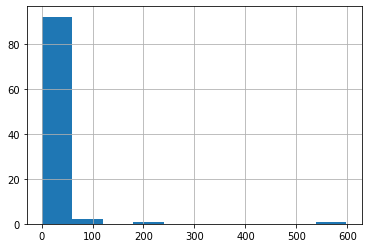

In [64]:
df1_count['pcount'].hist()

In [65]:
df_count["pcount"].skew()

12.077490612085867

In [66]:
df1_count["pcount"].skew()

7.911439355984083

In [67]:
df_count = (df1.groupby(['lat', 'long']).size() 
   .sort_values(ascending=False) 
   .reset_index(name='pcount')) 
  # .drop_duplicates(subset='col2'))

In [80]:
df_count.to_csv("df_count.csv")

In [81]:
df_count = pd.read_csv("df_count.csv")

In [85]:
df_count.head()

,lat,long,pcount
0,27.7167,85.3167,7300
1,28.0000,84.0000,5000
2,28.2088,82.1708,622
3,28.2185,83.9877,301
4,27.5833,84.5000,260


In [84]:
df_count.drop(columns={'Unnamed: 0'},inplace=True)

In [86]:
resp = df_count.pcount
from scipy.stats import shapiro
shapiro(resp)[1]


2.9313704406751075e-34

/home/samal/poudelnish/.conda/envs/aanisha/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pcount', ylabel='Density'>

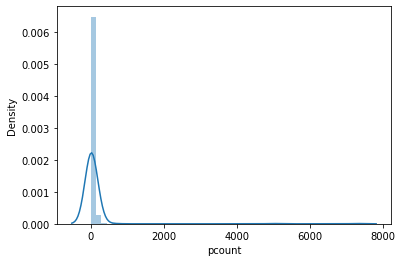

In [87]:
sns.distplot(resp)

/home/samal/poudelnish/.conda/envs/aanisha/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pcount', ylabel='Density'>

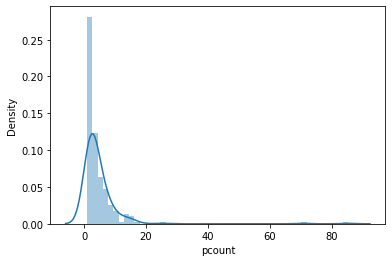

In [88]:
import seaborn as sns

sqrt_resp = resp**(0.5)
sns.distplot(sqrt_resp)

/home/samal/poudelnish/.conda/envs/aanisha/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pcount', ylabel='Density'>

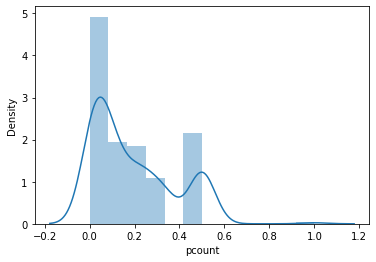

In [89]:
recip = 1/resp
sns.distplot(recip)

/home/samal/poudelnish/.conda/envs/aanisha/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pcount', ylabel='Density'>

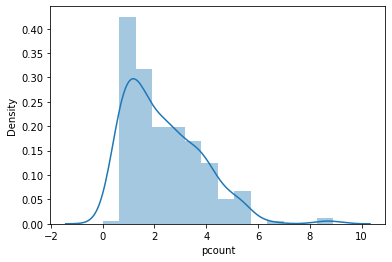

In [90]:
log_resp = np.log(resp)
sns.distplot(log_resp)


In [91]:
log_resp.describe()

count    278.000000
mean       2.346126
std        1.465513
min        0.000000
25%        1.098612
50%        2.079442
75%        3.286402
max        8.895630
Name: pcount, dtype: float64

In [92]:
log_resp.value_counts()

0.693147    50
1.386294    27
1.098612    25
1.609438    16
1.791759    13
            ..
3.912023     1
3.891820     1
3.871201     1
8.517193     1
0.000000     1
Name: pcount, Length: 79, dtype: int64

In [93]:
resp.value_counts()

2       50
4       27
3       25
5       16
6       13
        ..
50       1
49       1
48       1
5000     1
1        1
Name: pcount, Length: 79, dtype: int64

In [94]:
df2 = {'lat': 31.05, 'long': 81.13, 'pcount': 0}

df_count = df_count.append(df2, ignore_index = True)

df_count

,lat,long,pcount
0,27.7167,85.3167,7300.0
1,28.0000,84.0000,5000.0
2,28.2088,82.1708,622.0
3,28.2185,83.9877,301.0
4,27.5833,84.5000,260.0
...,...,...,...
274,27.5790,86.3452,2.0
275,28.7691,80.5636,2.0
276,30.0500,81.1333,2.0
277,31.0500,81.1300,1.0


In [95]:
df_count['pcount'].sum()

20211.0

In [24]:
df_count.to_csv("datapoints.csv", index=False)

<AxesSubplot:>

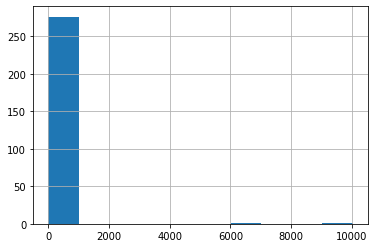

In [19]:
df_count['pcount'].hist()

In [20]:
nn = df_count['pcount'].value_counts()

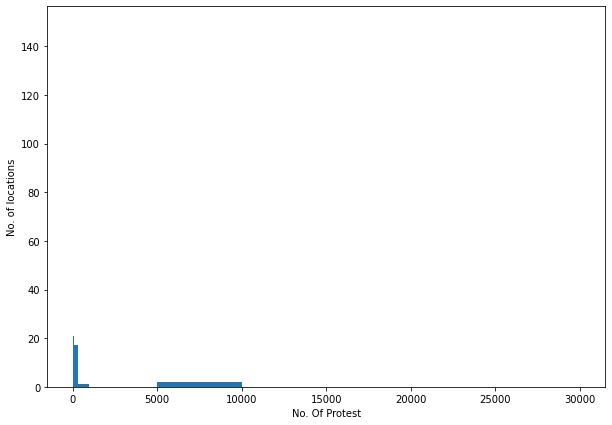

In [96]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
 
 
 

# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df_count['pcount'], bins = [0,1,2,10,50,100,300,500,1000,2000, 5000, 10000,25000,30000])
plt.xlabel("No. Of Protest")
plt.ylabel("No. of locations") 
# Show plot
plt.show()


In [97]:
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     279 non-null    float64
 1   long    279 non-null    float64
 2   pcount  279 non-null    float64
dtypes: float64(3)
memory usage: 6.7 KB


In [98]:
import geopandas
gdf = geopandas.GeoDataFrame(df_count, 
                                         geometry = geopandas.points_from_xy(df_count['long'], df_count['lat']),
                            crs = "EPSG:4326")
gdf.head()

/home/samal/poudelnish/.conda/envs/aanisha/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


,lat,long,pcount,geometry
0,27.7167,85.3167,7300.0,POINT (85.31670 27.71670)
1,28.0000,84.0000,5000.0,POINT (84.00000 28.00000)
2,28.2088,82.1708,622.0,POINT (82.17080 28.20880)
3,28.2185,83.9877,301.0,POINT (83.98770 28.21850)
4,27.5833,84.5000,260.0,POINT (84.50000 27.58330)


In [99]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   lat       279 non-null    float64 
 1   long      279 non-null    float64 
 2   pcount    279 non-null    float64 
 3   geometry  279 non-null    geometry
dtypes: float64(3), geometry(1)
memory usage: 8.8 KB


In [100]:
nepal = geopandas.read_file('/work/samal/poudelnish/protest2018/gdelt/nepalprotest/ochashp/npl_admbnda_districts_nd_20201117.shp')

In [101]:
nepal.head()

,Shape_Leng,Shape_Area,DIST_EN,DIST_PCODE,DIST_REF,DIST_ALT1E,DIST_ALT2E,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,2.669841,0.157628,Achham,NP0769,None,None,None,Sudurpaschim,NP07,Nepal,NP,2020-11-17,2020-11-17,None,"POLYGON ((81.17123 29.38651, 81.17158 29.38636..."
1,2.379392,0.113604,Arghakhanchi,NP0550,None,None,None,Lumbini,NP05,Nepal,NP,2020-11-17,2020-11-17,None,"POLYGON ((83.00452 28.11196, 83.00497 28.11185..."
2,2.885914,0.168997,Baglung,NP0443,None,None,None,Gandaki,NP04,Nepal,NP,2020-11-17,2020-11-17,None,"POLYGON ((83.09969 28.63449, 83.10098 28.63409..."
3,2.499412,0.138908,Baitadi,NP0774,None,None,None,Sudurpaschim,NP07,Nepal,NP,2020-11-17,2020-11-17,None,"POLYGON ((80.75845 29.70454, 80.75864 29.70430..."
4,3.157278,0.322517,Bajhang,NP0767,None,None,None,Sudurpaschim,NP07,Nepal,NP,2020-11-17,2020-11-17,None,"POLYGON ((81.09006 30.05419, 81.09033 30.05418..."


In [102]:
#gdf.rename(columns={"count": "pcount"} , inplace = True)

<AxesSubplot:>

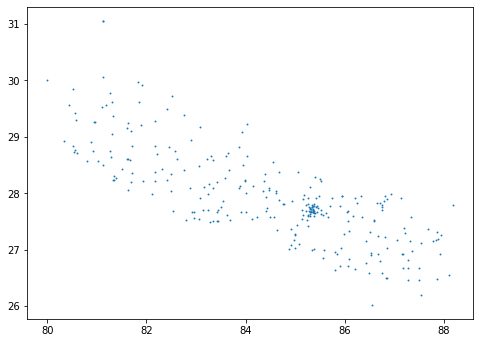

In [103]:
gdf.plot(markersize=.8, figsize=(8, 8))

(79.590835, 88.592465, 25.774905, 31.301195)

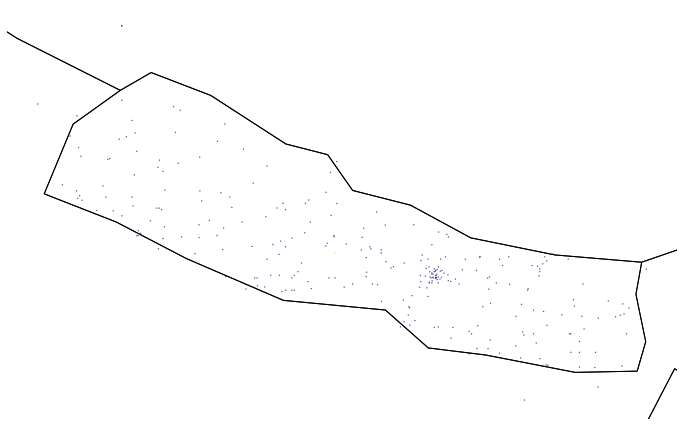

In [104]:
ax = gdf.plot(markersize=.1, figsize=(12, 12), column='pcount', cmap='jet')
plt.autoscale(False)
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
#world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
world.to_crs(gdf.crs).plot(ax=ax, color='none', edgecolor='black')
ax.axis('off')

In [105]:
from osgeo import gdal


In [106]:
dem = gdal.Open('/work/samal/poudelnish/proj_fraym/fraym_data/cropped/electricityvalue.tif')
#dem = gdal.Open('/work/samal/poudelnish/proj_fraym/fraym_data/rgb/eB2.tif')


In [107]:
gt = dem.GetGeoTransform()
gt

(84.590416343,
 0.008333333301282008,
 0.0,
 28.241250089,
 0.0,
 -0.008333333301136371)

In [108]:
dem.RasterXSize

156

In [109]:
dem.RasterYSize

176

In [110]:
import shapely
# get coordinates of upper left corner
xmin = gt[0]
ymax = gt[3]
res = gt[1]

# determine total length of raster
xlen = res * dem.RasterXSize
ylen = res * dem.RasterYSize

# number of tiles in x and y direction
xdiv = 156
ydiv = 176

# size of a single tile
xsize = xlen/xdiv
ysize = ylen/ydiv

# create lists of x and y coordinates
xsteps = [xmin + xsize * i for i in range(xdiv+1)]
ysteps = [ymax - ysize * i for i in range(ydiv+1)]
grid_cell = []
# loop over min and max x and y coordinates


In [111]:
centroid_grid =[]
crs = "EPSG:4326"
for i in range(xdiv):
    for j in range(ydiv):
        xmin = xsteps[i]
        xmax = xsteps[i+1]
        ymax = ysteps[j]
        ymin = ysteps[j+1]
        center_x = (xmax-xmin)/2
        center_y = (ymax-ymin)/2
        grid_cell.append( shapely.geometry.box(xmin, ymin, xmax, ymax) ) 
        centroid_grid.append((xmin+center_x,ymin+center_y))

tif_cell = geopandas.GeoDataFrame(grid_cell, columns=['geometry'], 
                                 crs=crs)
#center_cell = pd.DataFrame(centroid_grid,columns=['long_lat'])
#         print("xmin: "+str(xmin))
#         print("xmax: "+str(xmax))
#         print("ymin: "+str(ymin))
#         print("ymax: "+str(ymax))
#         print("\n")
        
       
 


In [112]:
# close the open dataset!!!
dem = None

In [113]:
tif_cell

,geometry
0,"POLYGON ((84.59875 28.23292, 84.59875 28.24125..."
1,"POLYGON ((84.59875 28.22458, 84.59875 28.23292..."
2,"POLYGON ((84.59875 28.21625, 84.59875 28.22458..."
3,"POLYGON ((84.59875 28.20792, 84.59875 28.21625..."
4,"POLYGON ((84.59875 28.19958, 84.59875 28.20792..."
...,...
27451,"POLYGON ((85.89042 26.80792, 85.89042 26.81625..."
27452,"POLYGON ((85.89042 26.79958, 85.89042 26.80792..."
27453,"POLYGON ((85.89042 26.79125, 85.89042 26.79958..."
27454,"POLYGON ((85.89042 26.78292, 85.89042 26.79125..."


In [114]:
len(grid_cell)

27456

In [115]:
len(centroid_grid)

27456

In [116]:
center_cell = pd.DataFrame(centroid_grid,columns=['grid_long','grid_lat'])

In [117]:

center_cell['index_no'] = center_cell.index
center_cell.head()

,grid_long,grid_lat,index_no
0,84.594583,28.237083,0
1,84.594583,28.228750,1
2,84.594583,28.220417,2
3,84.594583,28.212083,3
4,84.594583,28.203750,4


(79.590835, 88.592465, 25.774905, 31.301195)

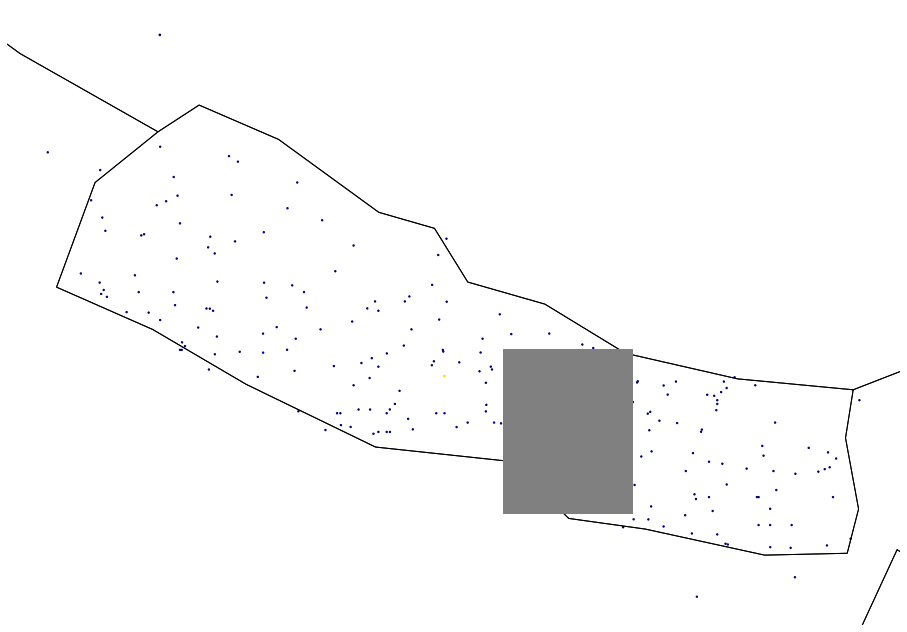

In [118]:
ax = gdf.plot(markersize=2.0, figsize=(16, 16), column='pcount', cmap='jet')
plt.autoscale(False)
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
#world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
world.to_crs(gdf.crs).plot(ax=ax, color='none', edgecolor='black')
tif_cell.plot(ax=ax, facecolor="none", edgecolor='grey')
ax.axis("off")

In [119]:
center_x, center_y = df['lat'].median(), df['long'].median()
print(center_x, center_y)

27.7167 85.3167


In [120]:
def generateBaseMap(default_location=[27.96715, 83.9830865], default_zoom_start=8, width=500, height=500):
    base_map = folium.Map(location=default_location, 
                          width=width,height=height,
                          control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [131]:
import folium
from folium import plugins
from folium.plugins import HeatMap

base_map = generateBaseMap([center_x, center_y], 8, 1000, 800)
folium.plugins.HeatMap(data=df_count[['lat', 'long', 'pcount']]
                       .groupby(['lat', 'long']).sum().reset_index().values.tolist()
                       , radius=15, max_zoom=10).add_to(base_map)
print('Number of protest in Nepal in year 2018')
base_map

Number of protest in Nepal in year 2018


In [122]:
# shape_BU = geopandas.read_file('ochashp/npl_admbnda_districts_nd_20201117.shp')
# shape_BU.plot()


(79.590835, 88.592465, 25.774905, 31.301195)

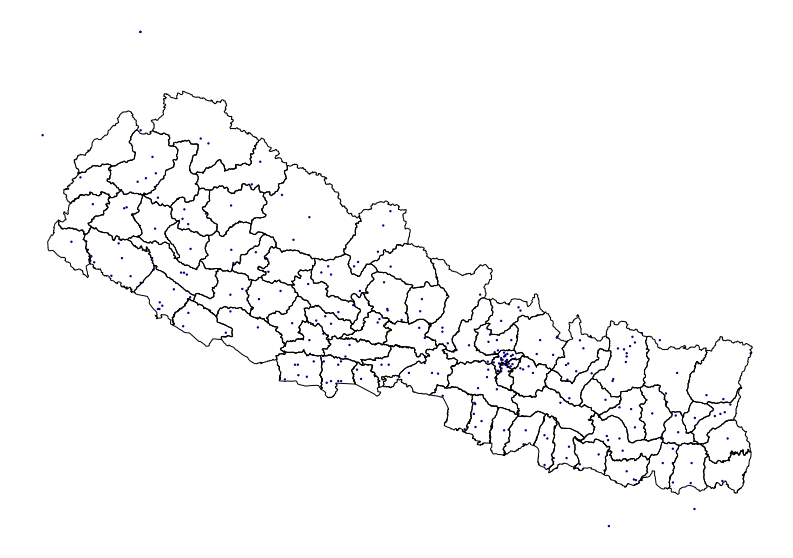

In [123]:
ax = gdf.plot(markersize=1.8, figsize=(16, 10), column='pcount', cmap='jet')
plt.autoscale(False)
world = geopandas.read_file('../ochashp/npl_admbnda_districts_nd_20201117.shp')
#world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
world.to_crs(gdf.crs).plot(ax=ax, color='none', edgecolor='black')
#tif_cell.plot(ax=ax, facecolor="none", edgecolor='grey')
ax.axis("off")

In [124]:
Total = df_count['pcount'].sum()
print (Total)

20211.0


In [125]:
merged = geopandas.sjoin(gdf, tif_cell, how='left', op='within')

/home/samal/poudelnish/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3361: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [126]:
# make a simple count variable that we can sum
merged['protest_count']=1
# Compute stats per grid cell -- aggregate fires to grid cells with dissolve
dissolve = merged.dissolve(by="index_right", aggfunc="count")
# put this into cell
tif_cell.loc[dissolve.index, 'protest_count'] = dissolve.protest_count.values

In [127]:
merged

,lat,long,pcount,geometry,index_right,protest_count
0,27.7167,85.3167,7300.0,POINT (85.31670 27.71670),15374.0,1
1,28.0000,84.0000,5000.0,POINT (84.00000 28.00000),NaN,1
2,28.2088,82.1708,622.0,POINT (82.17080 28.20880),NaN,1
3,28.2185,83.9877,301.0,POINT (83.98770 28.21850),NaN,1
4,27.5833,84.5000,260.0,POINT (84.50000 27.58330),NaN,1
...,...,...,...,...,...,...
274,27.5790,86.3452,2.0,POINT (86.34520 27.57900),NaN,1
275,28.7691,80.5636,2.0,POINT (80.56360 28.76910),NaN,1
276,30.0500,81.1333,2.0,POINT (81.13330 30.05000),NaN,1
277,31.0500,81.1300,1.0,POINT (81.13000 31.05000),NaN,1


In [128]:
Totalm = merged['pcount'].sum()
print (Totalm)

20211.0


In [129]:
Totalm = merged['protest_count'].sum()
print (Totalm)

279


In [130]:
tif_cell['index_right'] = tif_cell.index
tif_cell

,geometry,protest_count,index_right
0,"POLYGON ((84.59875 28.23292, 84.59875 28.24125...",NaN,0
1,"POLYGON ((84.59875 28.22458, 84.59875 28.23292...",NaN,1
2,"POLYGON ((84.59875 28.21625, 84.59875 28.22458...",NaN,2
3,"POLYGON ((84.59875 28.20792, 84.59875 28.21625...",NaN,3
4,"POLYGON ((84.59875 28.19958, 84.59875 28.20792...",NaN,4
...,...,...,...
27451,"POLYGON ((85.89042 26.80792, 85.89042 26.81625...",NaN,27451
27452,"POLYGON ((85.89042 26.79958, 85.89042 26.80792...",NaN,27452
27453,"POLYGON ((85.89042 26.79125, 85.89042 26.79958...",NaN,27453
27454,"POLYGON ((85.89042 26.78292, 85.89042 26.79125...",NaN,27454


In [56]:
tif_cell["protest_count"].sum()

77.0

In [57]:

df2 = tif_cell.merge(merged,on="index_right")
df2

,geometry_x,protest_count_x,index_right,lat,long,pcount,geometry_y,protest_count_y
0,"POLYGON ((84.62375 28.04125, 84.62375 28.04958...",1.0,551,28.0433,84.6206,2.0,POINT (84.62060 28.04330),1
1,"POLYGON ((84.62375 27.99958, 84.62375 28.00792...",1.0,556,28.0024,84.6201,280.0,POINT (84.62010 28.00240),1
2,"POLYGON ((84.62375 27.34958, 84.62375 27.35792...",1.0,634,27.3506,84.6231,2.0,POINT (84.62310 27.35060),1
3,"POLYGON ((84.69042 27.88292, 84.69042 27.89125...",1.0,1978,27.8844,84.6824,1.0,POINT (84.68240 27.88440),1
4,"POLYGON ((84.75708 27.79958, 84.75708 27.80792...",1.0,3396,27.8000,84.7500,57.0,POINT (84.75000 27.80000),1
...,...,...,...,...,...,...,...,...
72,"POLYGON ((85.67375 27.58292, 85.67375 27.59125...",1.0,22782,27.5833,85.6667,12.0,POINT (85.66670 27.58330),1
73,"POLYGON ((85.71542 27.77458, 85.71542 27.78292...",1.0,23639,27.7752,85.7104,5.0,POINT (85.71040 27.77520),1
74,"POLYGON ((85.75708 27.91625, 85.75708 27.92458...",1.0,24502,27.9167,85.7500,12.0,POINT (85.75000 27.91670),1
75,"POLYGON ((85.80708 26.94958, 85.80708 26.95792...",1.0,25674,26.9500,85.8000,3.0,POINT (85.80000 26.95000),1


In [58]:
Totalm = df2['pcount'].sum()
print (Totalm)

13280.0


In [59]:
df2.head()

,geometry_x,protest_count_x,index_right,lat,long,pcount,geometry_y,protest_count_y
0,"POLYGON ((84.62375 28.04125, 84.62375 28.04958...",1.0,551,28.0433,84.6206,2.0,POINT (84.62060 28.04330),1
1,"POLYGON ((84.62375 27.99958, 84.62375 28.00792...",1.0,556,28.0024,84.6201,280.0,POINT (84.62010 28.00240),1
2,"POLYGON ((84.62375 27.34958, 84.62375 27.35792...",1.0,634,27.3506,84.6231,2.0,POINT (84.62310 27.35060),1
3,"POLYGON ((84.69042 27.88292, 84.69042 27.89125...",1.0,1978,27.8844,84.6824,1.0,POINT (84.68240 27.88440),1
4,"POLYGON ((84.75708 27.79958, 84.75708 27.80792...",1.0,3396,27.8000,84.7500,57.0,POINT (84.75000 27.80000),1


In [60]:
df2.shape

(77, 8)

In [61]:
df2.to_csv("datapoints.csv",index=False)

In [62]:
tif_cell.shape

(27456, 3)

In [63]:
tif_cell.head()

,geometry,protest_count,index_right
0,"POLYGON ((84.59875 28.23292, 84.59875 28.24125...",NaN,0
1,"POLYGON ((84.59875 28.22458, 84.59875 28.23292...",NaN,1
2,"POLYGON ((84.59875 28.21625, 84.59875 28.22458...",NaN,2
3,"POLYGON ((84.59875 28.20792, 84.59875 28.21625...",NaN,3
4,"POLYGON ((84.59875 28.19958, 84.59875 28.20792...",NaN,4


In [64]:
df3 = df2.drop(["protest_count_x","index_right","lat","long","protest_count_y"], axis=1)
df3.head()

,geometry_x,pcount,geometry_y
0,"POLYGON ((84.62375 28.04125, 84.62375 28.04958...",2.0,POINT (84.62060 28.04330)
1,"POLYGON ((84.62375 27.99958, 84.62375 28.00792...",280.0,POINT (84.62010 28.00240)
2,"POLYGON ((84.62375 27.34958, 84.62375 27.35792...",2.0,POINT (84.62310 27.35060)
3,"POLYGON ((84.69042 27.88292, 84.69042 27.89125...",1.0,POINT (84.68240 27.88440)
4,"POLYGON ((84.75708 27.79958, 84.75708 27.80792...",57.0,POINT (84.75000 27.80000)


In [65]:
df3.shape

(77, 3)

In [52]:
# tiffcell1 = tif_cell.drop(["index_right"], axis=1)
# tiffcell1.head()

,geometry,protest_count
0,"POLYGON ((84.59875 28.23292, 84.59875 28.24125...",NaN
1,"POLYGON ((84.59875 28.22458, 84.59875 28.23292...",NaN
2,"POLYGON ((84.59875 28.21625, 84.59875 28.22458...",NaN
3,"POLYGON ((84.59875 28.20792, 84.59875 28.21625...",NaN
4,"POLYGON ((84.59875 28.19958, 84.59875 28.20792...",NaN


In [3]:
#tif_cell = pd.read_csv("original_landsat/protestalignedpixel.csv")

In [66]:
tif_cell.shape

(27456, 3)

In [68]:
df_allevents = pd.merge(tif_cell,df2, how="left", on=["index_right"])
df_allevents.shape

(27458, 10)

In [69]:
df_allevents.head()

,geometry,protest_count,index_right,geometry_x,protest_count_x,lat,long,pcount,geometry_y,protest_count_y
0,"POLYGON ((84.59875 28.23292, 84.59875 28.24125...",NaN,0,None,NaN,NaN,NaN,NaN,None,NaN
1,"POLYGON ((84.59875 28.22458, 84.59875 28.23292...",NaN,1,None,NaN,NaN,NaN,NaN,None,NaN
2,"POLYGON ((84.59875 28.21625, 84.59875 28.22458...",NaN,2,None,NaN,NaN,NaN,NaN,None,NaN
3,"POLYGON ((84.59875 28.20792, 84.59875 28.21625...",NaN,3,None,NaN,NaN,NaN,NaN,None,NaN
4,"POLYGON ((84.59875 28.19958, 84.59875 28.20792...",NaN,4,None,NaN,NaN,NaN,NaN,None,NaN


In [70]:
df4 =df_allevents.drop(["protest_count_x","geometry_x","lat","long","protest_count_y","geometry_y"], axis=1)

In [72]:
df4.shape

(27458, 4)

In [73]:
df4.drop(["protest_count"], axis=1,inplace = True)

In [76]:
df4['pcount'] = df4['pcount'].replace(np.nan, 0)

In [78]:
df4.to_csv("2feb25allevents.csv")